- Introduction:

The raw network packets of the UNSW-NB15 is a comprehensive dataset for network intrusion detection systems (UNSW-NB15 network data set) which was created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours.

This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms. The Argus, Bro-IDS tools are used and twelve algorithms are developed to generate totally 49 features with the class label.

I use a partition from this dataset is configured as a training set, namely, UNSW_NB15_training-set.csv.

The number of records in the training set is 175,341 records from the different types, attack and normal.


In [2]:
# Import Liberaries and Packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import struct
%matplotlib inline
from wordcloud import WordCloud
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# Concat all dataset's files:

df = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\capstonbotdataset\UNSW_NB15_training-set.csv')


In [4]:
# Look at the dataset:

df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
# look at the shape of dataset:

df.shape

(82332, 45)

In [6]:
# Clean dataset by droping duplicates: 

df.drop_duplicates(inplace=True)

In [7]:
# Look at the length of dataset after removing duplicate:

len(df)

82332

In [8]:
# Look at the type of columns:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 0 to 82331
Data columns (total 45 columns):
id                   82332 non-null int64
dur                  82332 non-null float64
proto                82332 non-null object
service              82332 non-null object
state                82332 non-null object
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-n

In [9]:
# Findout number of unique value in each column:

for col in df.columns:
    print("Number of Unique Values in Column {} are: {}".format(col, df[col].nunique()))

Number of Unique Values in Column id are: 82332
Number of Unique Values in Column dur are: 39888
Number of Unique Values in Column proto are: 131
Number of Unique Values in Column service are: 13
Number of Unique Values in Column state are: 7
Number of Unique Values in Column spkts are: 420
Number of Unique Values in Column dpkts are: 436
Number of Unique Values in Column sbytes are: 4489
Number of Unique Values in Column dbytes are: 4034
Number of Unique Values in Column rate are: 40616
Number of Unique Values in Column sttl are: 11
Number of Unique Values in Column dttl are: 8
Number of Unique Values in Column sload are: 42873
Number of Unique Values in Column dload are: 40614
Number of Unique Values in Column sloss are: 253
Number of Unique Values in Column dloss are: 311
Number of Unique Values in Column sinpkt are: 39970
Number of Unique Values in Column dinpkt are: 37617
Number of Unique Values in Column sjit are: 39944
Number of Unique Values in Column djit are: 38381
Number of 

In [10]:
# Findout percentage of missing values in each columns:

null_count = round(df.isnull().sum()*100/df.isnull().count(),2)
null_count[null_count>0]

Series([], dtype: float64)

In [11]:
# Findout object columns:

object_columns = df.select_dtypes('object')
object_columns.head()

,proto,service,state,attack_cat
0,udp,-,INT,Normal
1,udp,-,INT,Normal
2,udp,-,INT,Normal
3,udp,-,INT,Normal
4,udp,-,INT,Normal


In [12]:
# Findout unique values in each object columns:

for col in object_columns:
    print("Unique values in column {} are: {}, {}".format(col, df[col].nunique(), df[col].unique()))

Unique values in column proto are: 131, ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'
 'smp' 'isis' '

In [13]:
# Reolace the '-' to null:

df['service'] = df['service'].replace('-', np.nan)

In [16]:
# Findout number of null in each columns:###need to drop column

null_count = df.isnull().sum()*100/len(df)
null_count[null_count>0]

service    57.271778
dtype: float64

In [14]:
# Convert service columns to boolean:
#service_isnull = pd.isnull(df['service'])


In [15]:
# for findout the missing value has bussinus meaning or not , we have to create new dataframe with target variable
# and missing values and check the relationship.

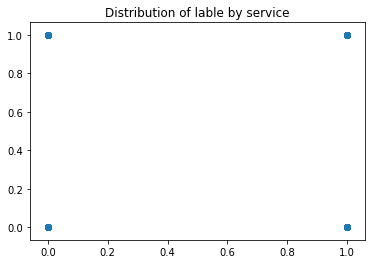

In [16]:
# Look at the distribution of target variable with missing value columns: we can use any plot 

plt.scatter(df['label'], service_isnull)
plt.title('Distribution of lable by service')
plt.show()

In [18]:
# fill in missing values in Categorical variable with the the value of the next highest-ranked service category:

#service_list = df.service

#for i in range(1, len(df.service)):
#    if pd.isnull(df.service[i]):
#        df.service[i] = df.service[i-1]
        
#df["service"].unique()

array([nan, 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [19]:
# Fill remain of service column:
#df['service'] = df['service'].fillna(df['service'].value_counts().index[0])


In [20]:
# Look at the unique value of service column again:
#df["service"].unique()

array(['dns', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'snmp', 'ssl',
       'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [21]:
# Descriptive statistics for object variables:

df.describe(include=['O'])

,proto,service,state,attack_cat
count,82332,82332,82332,82332
unique,131,12,7,10
top,tcp,dns,FIN,Normal
freq,43095,33969,39339,37000


In [22]:
# Get univariate statistics for numeric columns:

df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


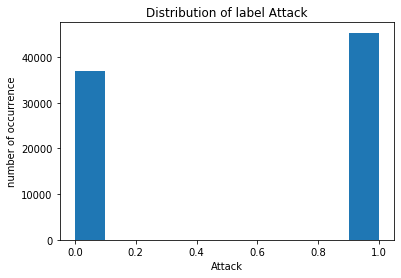

In [23]:
# Look at the distribution of target variable:

plt.hist(df['label'])
plt.title('Distribution of label Attack')
plt.xlabel("Attack")
plt.ylabel("number of occurrence")
plt.show()

In [17]:
# For meodeling we have to assume the target variable to be normally distributed. So we can this with log. 
#plt.hist(np.log(df['label']))#??? we got error because the value are 0 and 1????
#plt.title('Distribution of label Attack(log)')
#plt.xlabel("Attack or normal")
#plt.ylabel("number of occurrence")
#plt.show()
############only do this for regression problem


In [25]:
# We can confirm distribution of attack is normal or not by using the Jargue-Bera and Normal tests as a statistical test:
#jb_stats = jarque_bera(df["label"])
#norm_stats = normaltest(df["label"])

#print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
#print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
#################only do this for regression problem#############

Jarque-Bera test statistics is 13727.876804728541 and p value is 0.0
Normality test statistics is 288037.45902653463 and p value is 0.0


The p-values are 0 which indicates that the distribution of variable is statistically different from the normal distribution.

In [26]:
#For meodeling we have to assume the target variable to be normally distributed. So we can this with coxbox.
#labelattack_boxcox,_ = boxcox(df['label'])

# histograms of the box-cox transformed data:

#plt.hist(attack_boxcox)
#plt.title("histogram of attack (box-cox transformed)")

#plt.show()


 ########### only do coxplot  regression problem

In [31]:
# For meodeling we have to assume the target variable to be Normalized and standardized.
#?????why without reshape get error??????????????? what does reshape do????

#df["norm_label"] = normalize(np.array(df["label"]).reshape(1,-1)).reshape(-1,1)


# draw the scatter plot using seaborn.
#plt.scatter(df["label"], df["norm-label"])
#plt.title("scatterplot of label attack and normalized values of label attack")
#plt.xlabel("label")
#plt.ylabel("label (normalized)")

 ########### only do normalize for  regression problem

0.004697    45332
0.000000    37000
Name: norm_label, dtype: int64

In [32]:
# Standardize the variable:
#df["scale_label"] = scale(df["label"])
 ########### only do standard for  regression problem

In [33]:
# look at the correlation between columns:
df.corr()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,norm_label,scale_label
id,1.000000,0.016037,-0.020766,-0.037020,-0.005647,-0.031115,-0.121700,0.095939,0.306539,-0.003063,...,-0.297913,-0.049584,-0.049279,0.035399,-0.345738,-0.275818,0.097736,-0.387489,-0.387489,-0.387489
dur,0.016037,1.000000,0.280239,0.217507,0.225432,0.172492,-0.118031,-0.000986,0.090048,-0.076343,...,-0.071127,0.015724,0.015547,0.018879,-0.080789,-0.091253,0.027472,-0.001145,-0.001145,-0.001145
spkts,-0.020766,0.280239,1.000000,0.369554,0.965750,0.198324,-0.068249,-0.092536,0.054601,-0.044194,...,-0.061852,0.010361,0.010423,0.000443,-0.049367,-0.058815,-0.013960,-0.027731,-0.027731,-0.027731
dpkts,-0.037020,0.217507,0.369554,1.000000,0.175834,0.976419,-0.083173,-0.163830,0.036483,-0.054145,...,-0.075012,0.012473,0.012555,0.021041,-0.057374,-0.063169,-0.016103,-0.061515,-0.061515,-0.061515
sbytes,-0.005647,0.225432,0.965750,0.175834,1.000000,0.010036,-0.025102,-0.017866,0.049891,-0.015228,...,-0.024065,-0.002572,-0.002569,-0.004626,-0.021540,-0.030049,-0.004910,0.020641,0.020641,0.020641
dbytes,-0.031115,0.172492,0.198324,0.976419,0.010036,1.000000,-0.047978,-0.114537,0.012537,-0.031266,...,-0.044048,-0.006521,-0.006498,0.022901,-0.033301,-0.034416,-0.009267,-0.032632,-0.032632,-0.032632
rate,-0.121700,-0.118031,-0.068249,-0.083173,-0.025102,-0.047978,1.000000,0.388155,-0.453913,0.550104,...,0.358902,-0.050093,-0.049952,-0.112432,0.327563,0.370816,-0.058689,0.328629,0.328629,0.328629
sttl,0.095939,-0.000986,-0.092536,-0.163830,-0.017866,-0.114537,0.388155,1.000000,-0.033338,0.252901,...,0.335118,-0.089618,-0.089897,-0.174840,0.236869,0.304131,-0.187933,0.504159,0.504159,0.504159
dttl,0.306539,0.090048,0.054601,0.036483,0.049891,0.012537,-0.453913,-0.033338,1.000000,-0.293939,...,-0.364181,0.052195,0.050854,0.208628,-0.403289,-0.454576,-0.087019,-0.098591,-0.098591,-0.098591
sload,-0.003063,-0.076343,-0.044194,-0.054145,-0.015228,-0.031266,0.550104,0.252901,-0.293939,1.000000,...,0.155386,-0.032551,-0.032464,-0.072814,0.110013,0.160250,-0.038030,0.124548,0.124548,0.124548


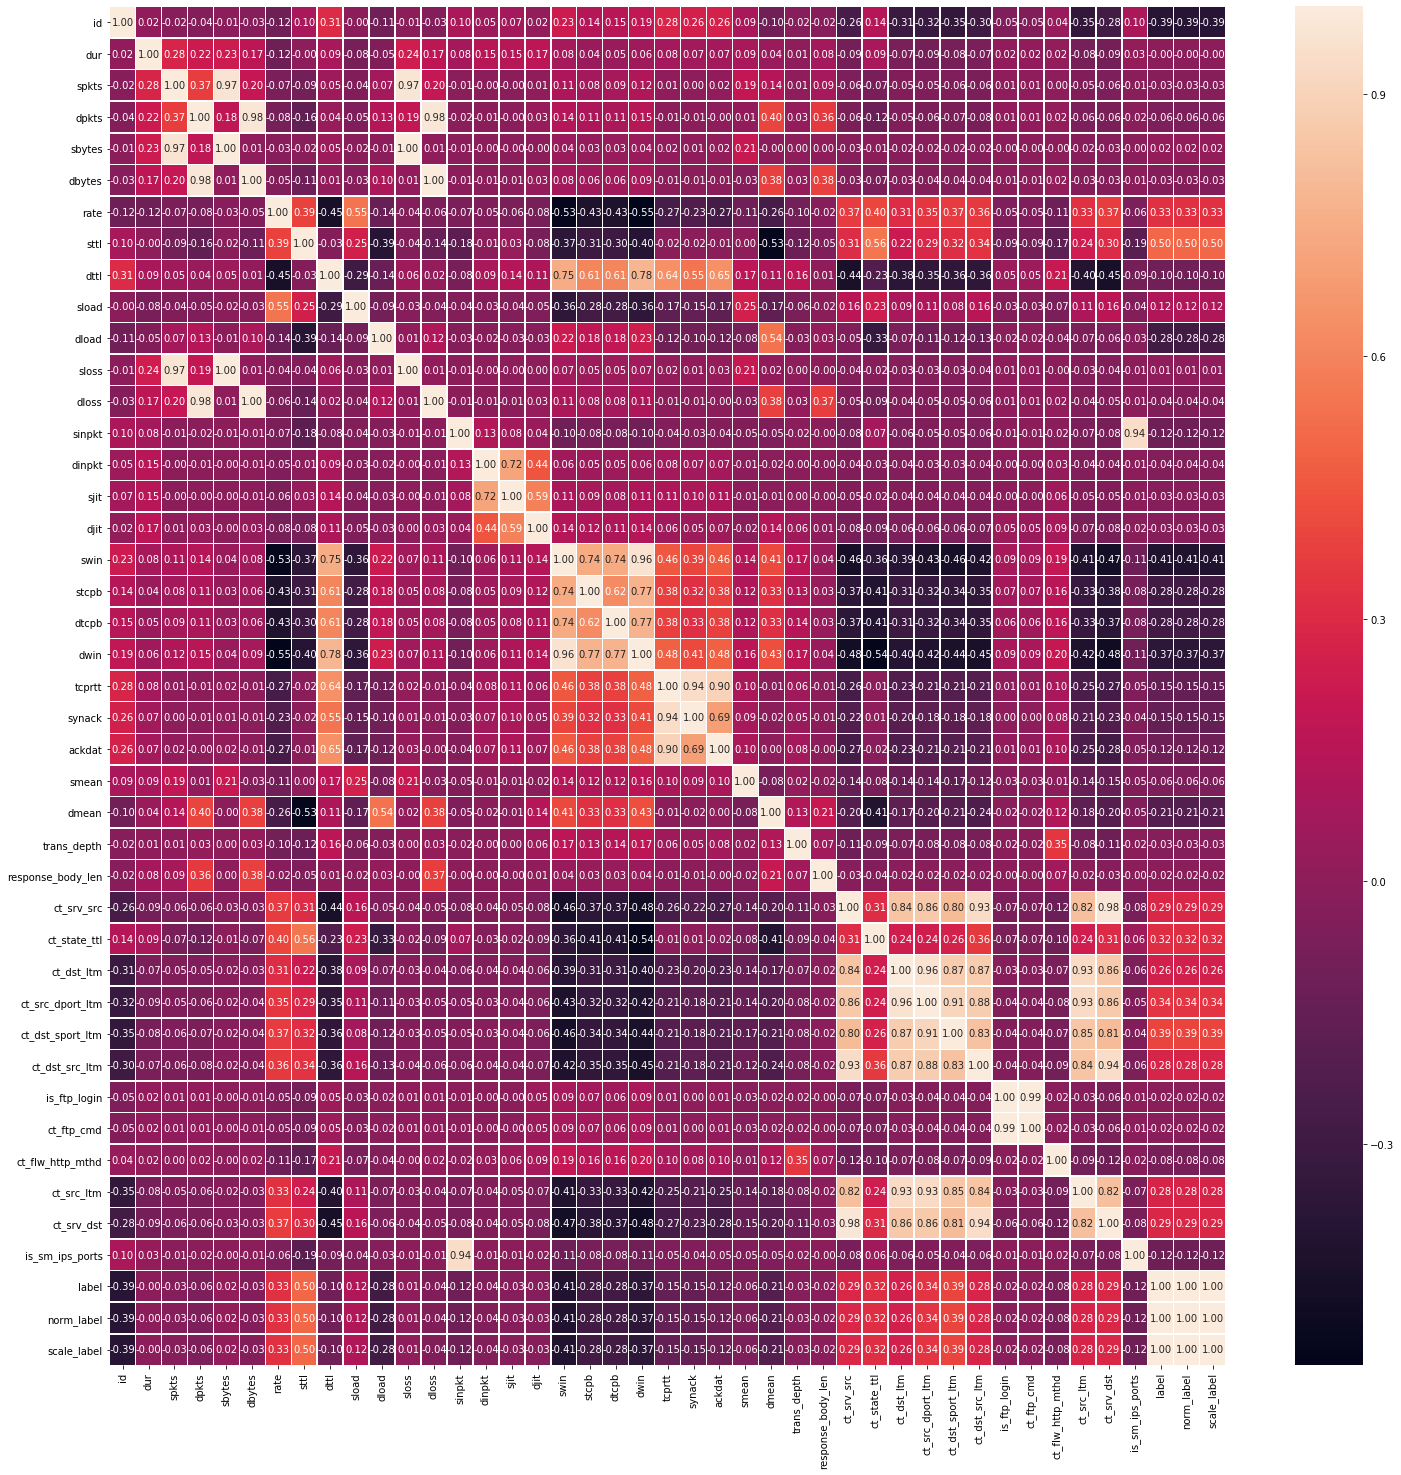

In [34]:
# look at the correlation between columns:

plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f')

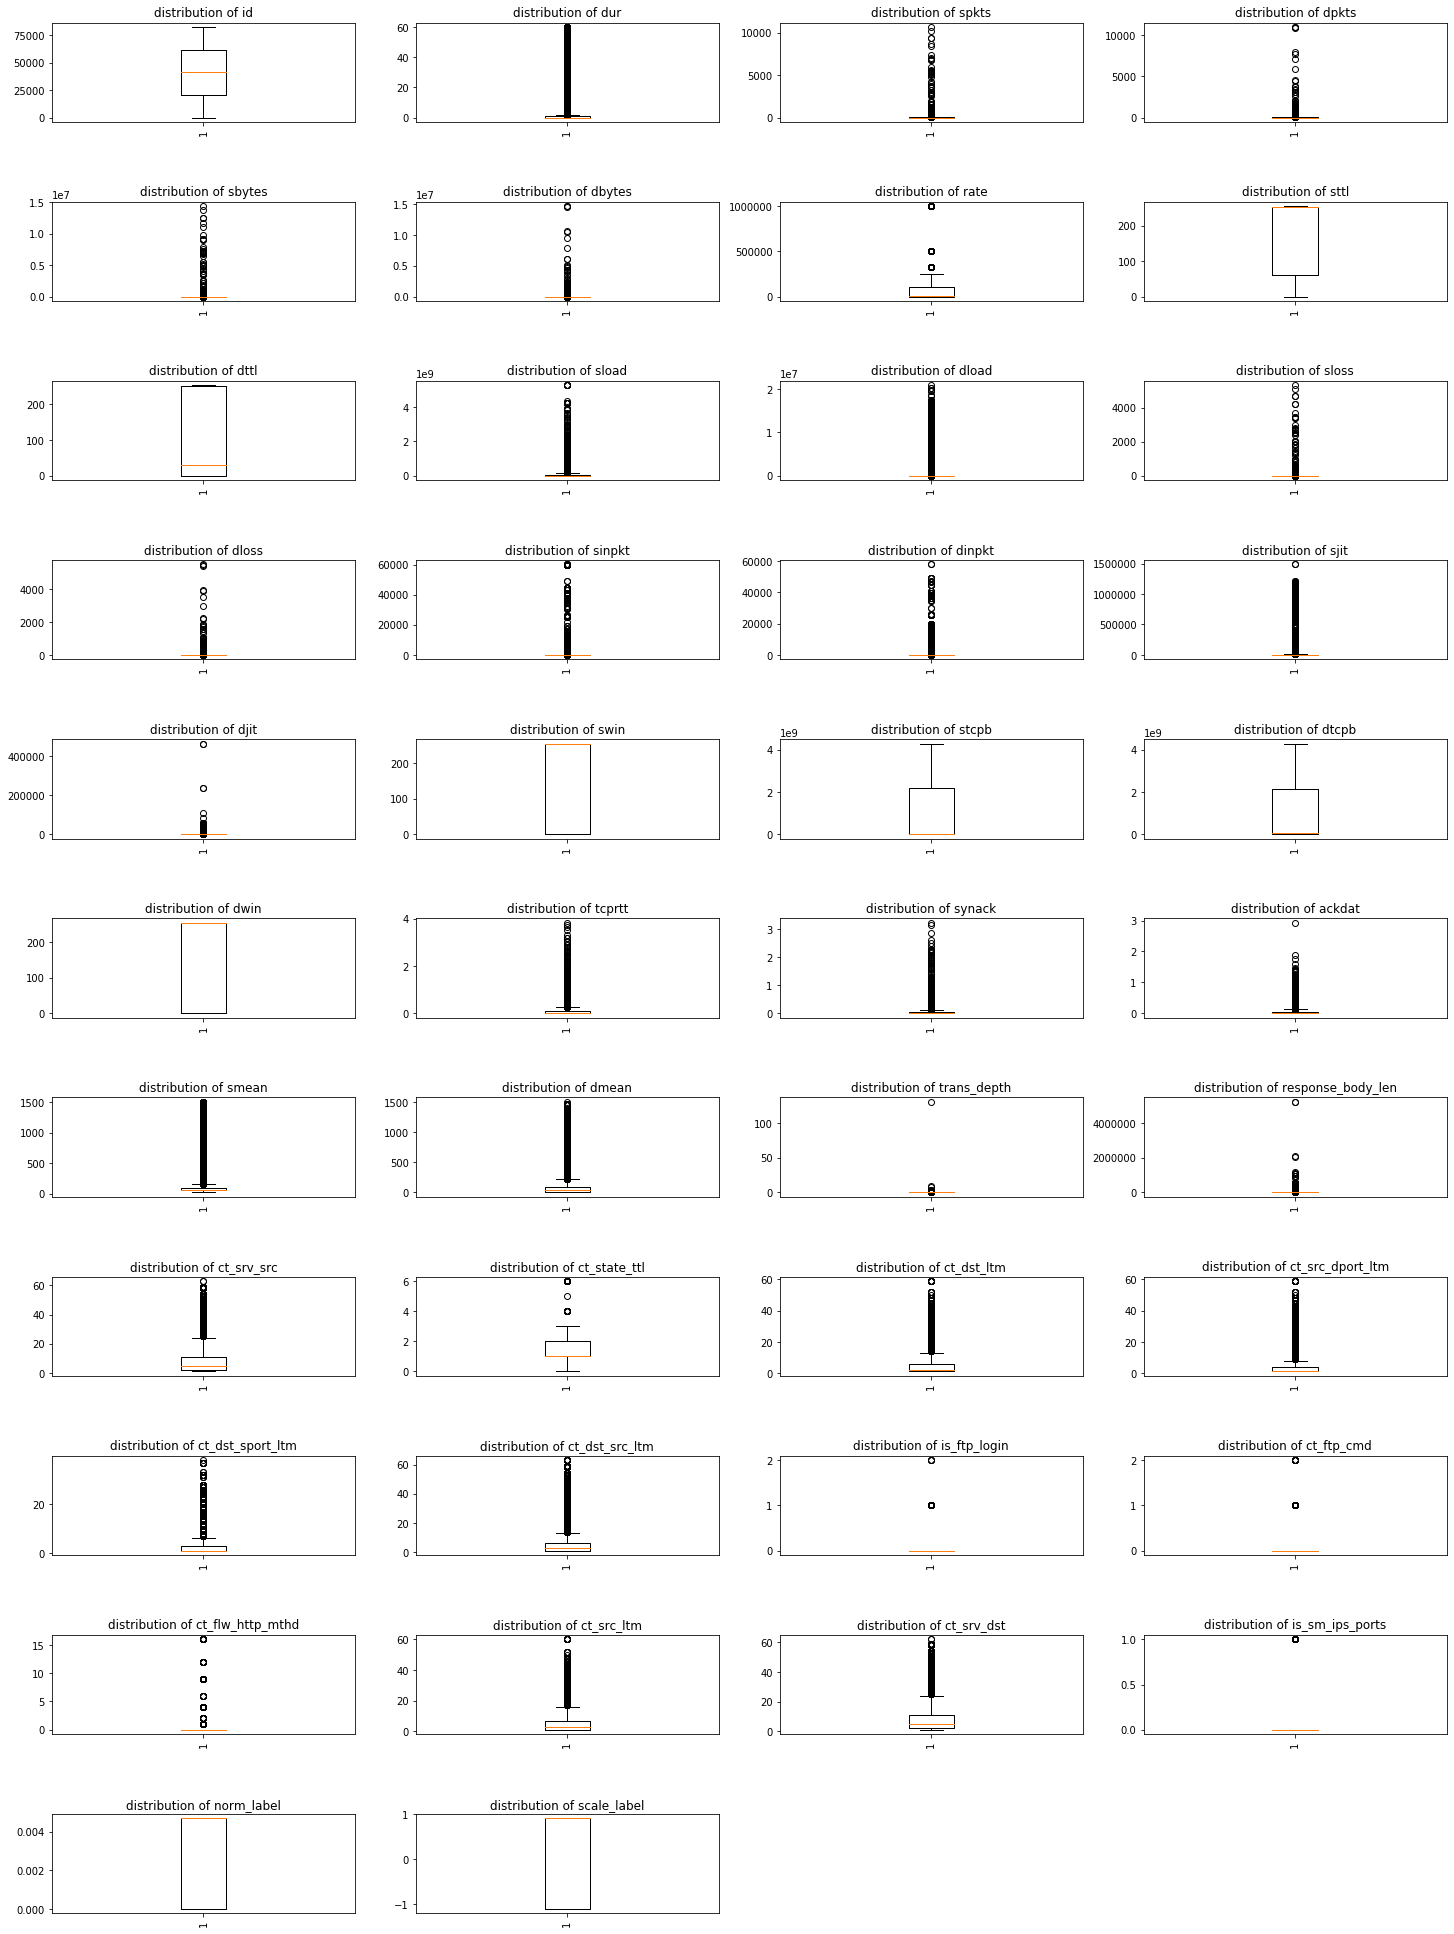

In [35]:
# Look at the distribution of all numeric columns for finding outliers:

df1 = df.select_dtypes(exclude=['object']).drop('label', axis=1)
plt.figure(figsize=(25,50))
for i,col in enumerate(df1):
    plt.subplot(12, 4, i+1)
    plt.boxplot(df[col],whis=1.5)
    plt.title(f'distribution of {col}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

As you can see most of the columns have outlier.

In [36]:
# Findout number of outlier by using Tukey's method:

df1 = df1.to_dict()
for col,i in df1.items():
    q75,q25=np.percentile(df[col],[75,25])
    iqr=q75-q25
    min_val=q25-(iqr*1.5)
    max_val=q75+(iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(col,
           len((np.where((df[col] > max_val)|(df[col] < min_val))[0])),
           round(len((np.where((df[col] > max_val)|(df[col] < min_val))[0]))*100/len(df1),2)))

Number of outliers and percentage of it in id : 0 and 0.0
Number of outliers and percentage of it in dur : 5868 and 13971.43
Number of outliers and percentage of it in spkts : 10196 and 24276.19
Number of outliers and percentage of it in dpkts : 8907 and 21207.14
Number of outliers and percentage of it in sbytes : 9270 and 22071.43
Number of outliers and percentage of it in dbytes : 12308 and 29304.76
Number of outliers and percentage of it in rate : 6201 and 14764.29
Number of outliers and percentage of it in sttl : 0 and 0.0
Number of outliers and percentage of it in dttl : 0 and 0.0
Number of outliers and percentage of it in sload : 6715 and 15988.1
Number of outliers and percentage of it in dload : 18112 and 43123.81
Number of outliers and percentage of it in sloss : 5499 and 13092.86
Number of outliers and percentage of it in dloss : 11272 and 26838.1
Number of outliers and percentage of it in sinpkt : 5668 and 13495.24
Number of outliers and percentage of it in dinpkt : 4717 and 

In [37]:
# Using log transformation to decrease number of outlier:????? after reduce outlier by log i have to use the log variable in the 
                                                            #???remain of project?????
for col,i in df1.items():
    q75,q25=np.percentile(np.log(df[col]),[75,25])
    iqr=q75-q25
    min_val=q25-(iqr*1.5)
    max_val=q75+(iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(col,
           len((np.where((np.log(df[col]) > max_val)|(np.log(df[col]) < min_val))[0])),
           round(len((np.where((np.log(df[col]) > max_val)|(np.log(df[col]) < min_val))[0]))*100/len(df1),2)))

Number of outliers and percentage of it in id : 3961 and 9430.95
Number of outliers and percentage of it in dur : 950 and 2261.9
Number of outliers and percentage of it in spkts : 960 and 2285.71
Number of outliers and percentage of it in dpkts : 0 and 0.0
Number of outliers and percentage of it in sbytes : 1429 and 3402.38
Number of outliers and percentage of it in dbytes : 0 and 0.0
Number of outliers and percentage of it in rate : 999 and 2378.57
Number of outliers and percentage of it in sttl : 1086 and 2585.71
Number of outliers and percentage of it in dttl : 0 and 0.0
Number of outliers and percentage of it in sload : 999 and 2378.57
Number of outliers and percentage of it in dload : 0 and 0.0
Number of outliers and percentage of it in sloss : 0 and 0.0
Number of outliers and percentage of it in dloss : 0 and 0.0
Number of outliers and percentage of it in sinpkt : 181 and 430.95
Number of outliers and percentage of it in dinpkt : 0 and 0.0
Number of outliers and percentage of it 

In [38]:
# Findout numeric columns:

numeric_columns = df.select_dtypes(exclude=['object']).columns
print('Number of numeric columns is {}'.format(len(numeric_columns)))

Number of numeric columns is 43


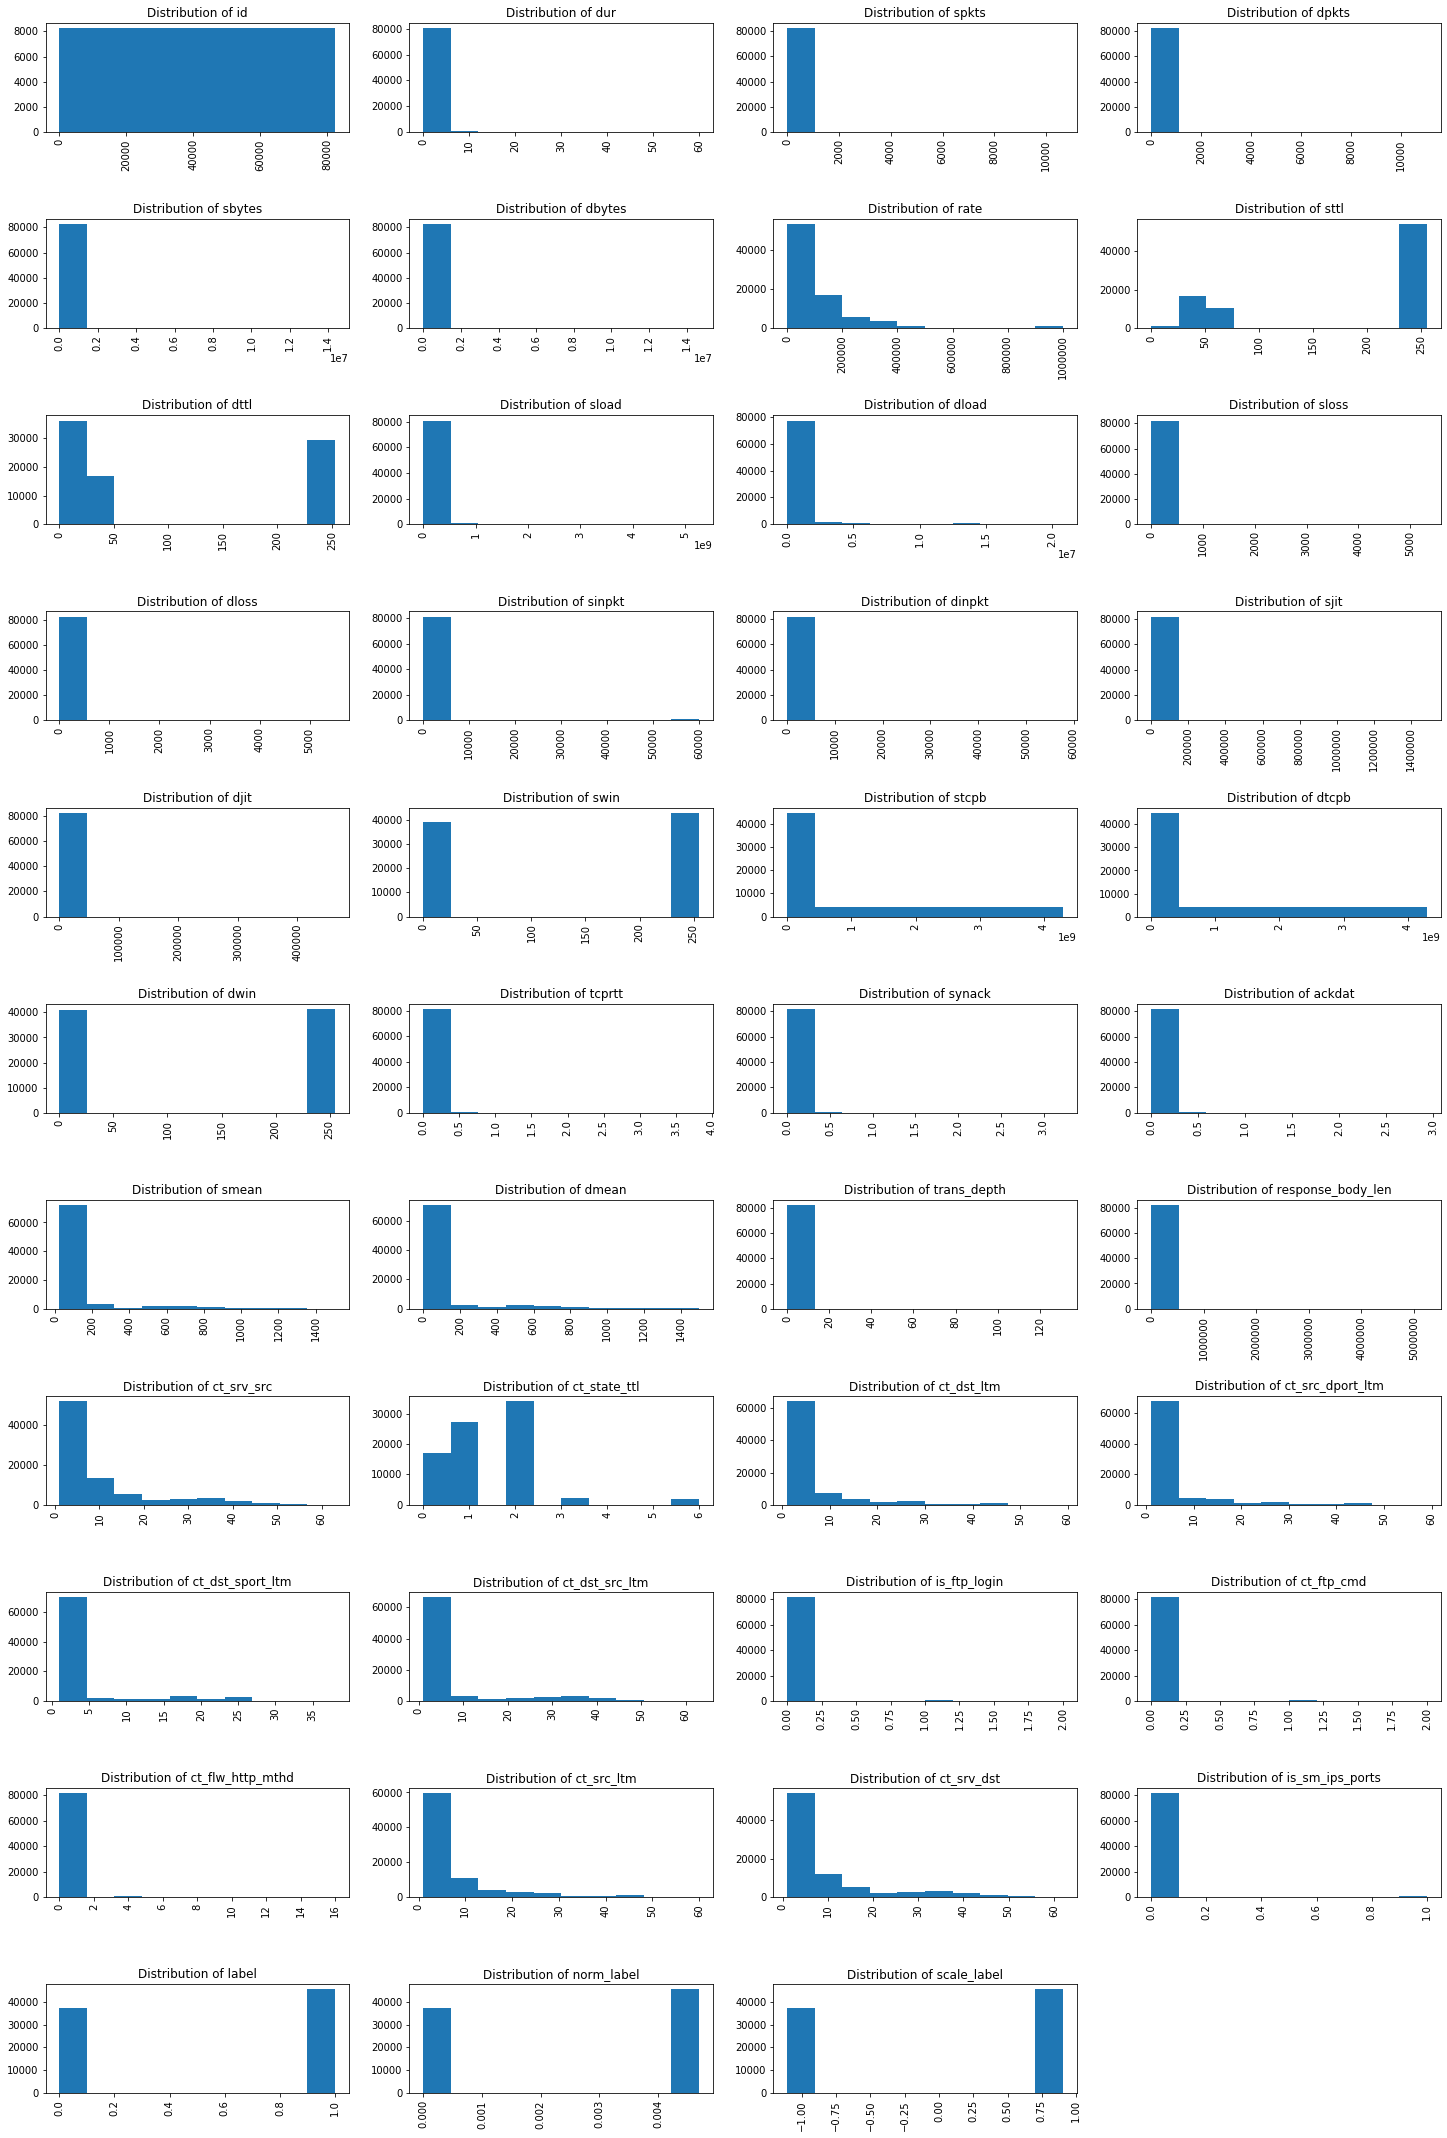

In [39]:
# Univariate visualization of continuous variables by using hist:

plt.figure(figsize=(25,50))
for i,col in enumerate(numeric_columns):
    plt.subplot(11, 4, i+1)
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

In [40]:
# Findout non_numeric columns:

nonnumeric_columns = df.select_dtypes(['object']).columns
print('Number of non_numeric columns is {}'.format(len(nonnumeric_columns)))

Number of non_numeric columns is 4


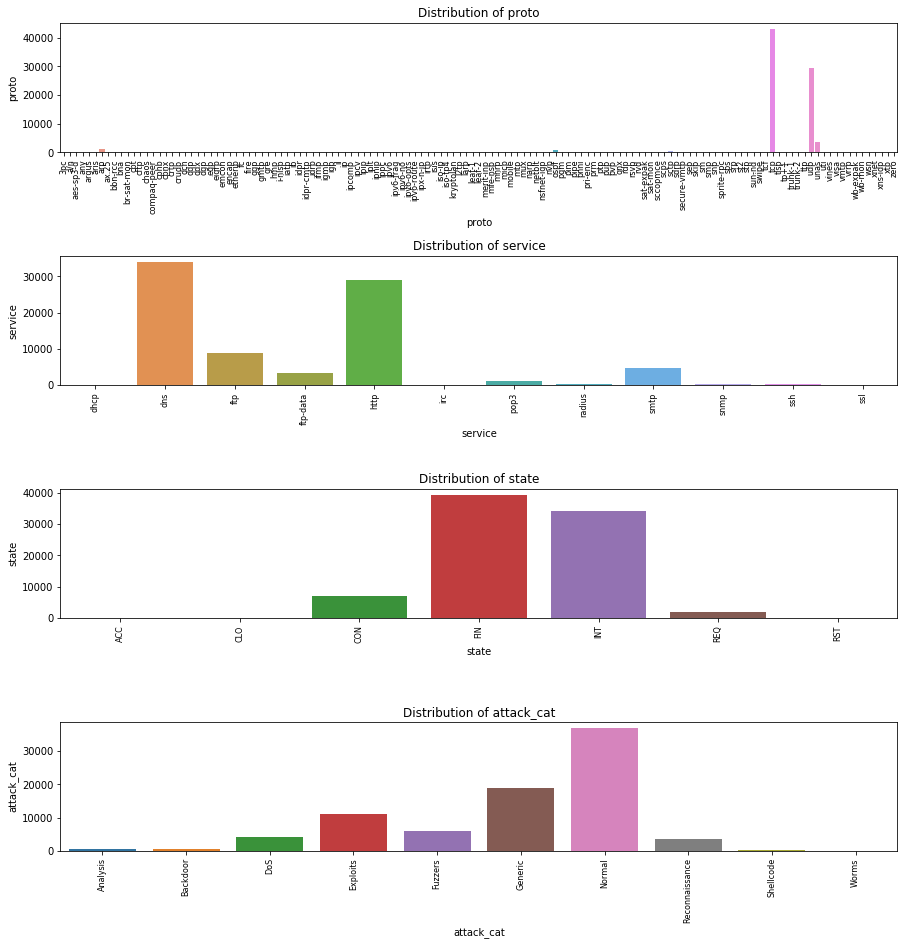

In [41]:
# Univariate visualization of categorical variables by barplot:

plt.figure(figsize=(15,20))
for i,col in enumerate(nonnumeric_columns):
    plt.subplot(4, 1, i+1)
    sns.barplot(df.groupby(col)[col].count().index, df.groupby(col)[col].count())
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

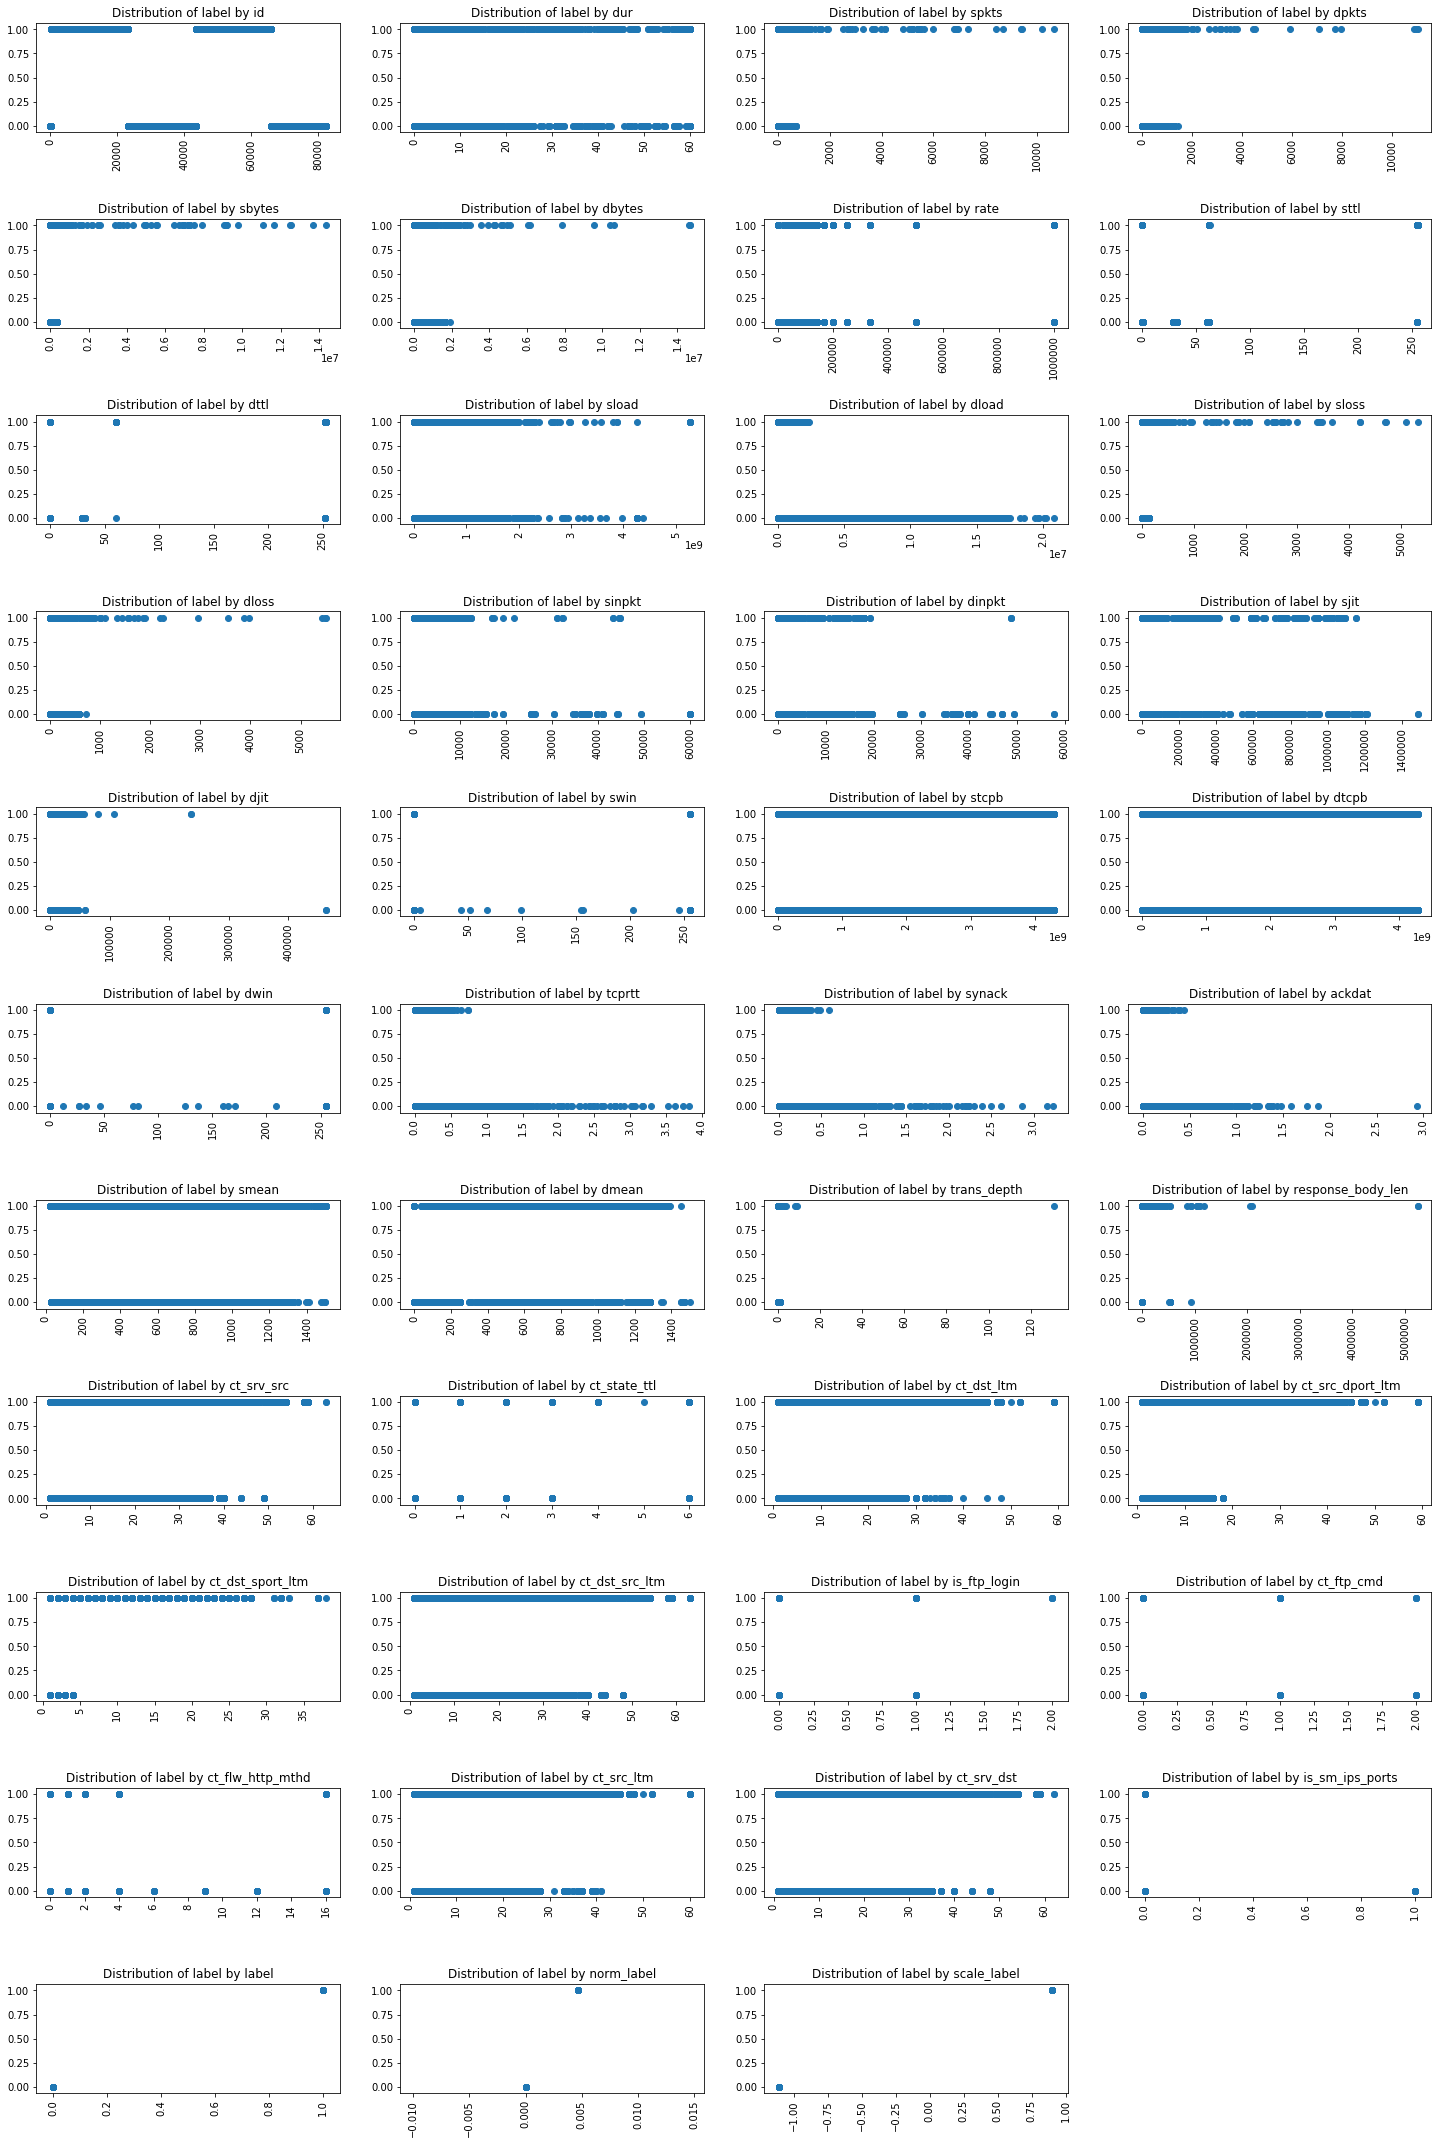

In [42]:
# Bivariate analysis of  continuous variables by scatter plot:

plt.figure(figsize=(25,50))
for i,col in enumerate(numeric_columns):
    plt.subplot(11, 4, i+1)
    plt.scatter(df[col], df['label'])
    plt.title(f'Distribution of label by {col}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

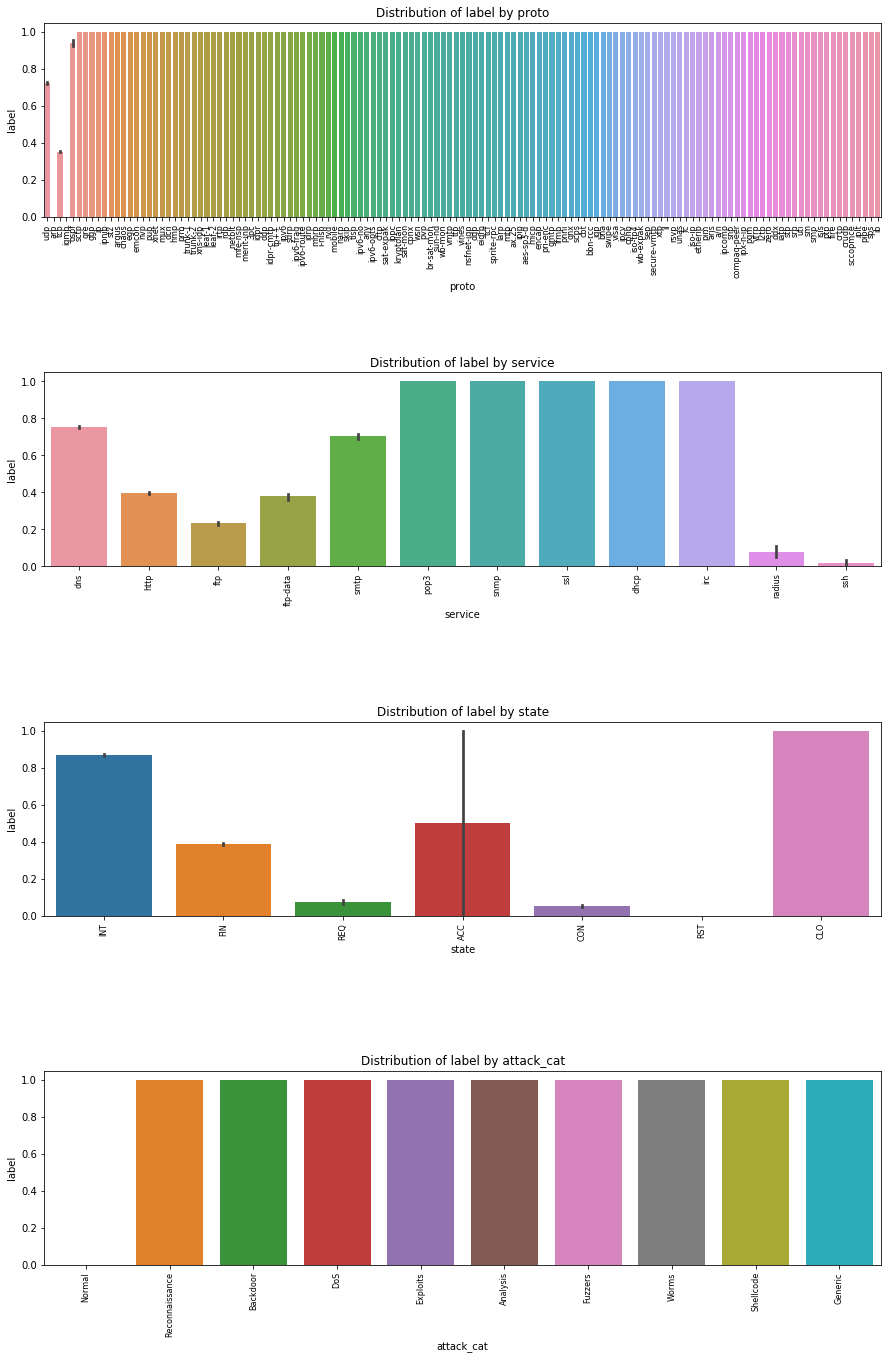

In [43]:
# Bivariate analysis of a continuous-categorical pair:

plt.figure(figsize=(15,30))
for i,col in enumerate(nonnumeric_columns):
    plt.subplot(4,1,i+1)
    sns.barplot(df[col], df['label'])
    plt.title(f'Distribution of label by {col}')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

In [44]:
# Now check by statical test to confirm diffrences: 

states = df["state"].unique()
for i in range(0, len(states)):
    for j in range(i+1, len(states)):
        print("t-test between groups {0} and {1}:".format(states[i], states[j]))
        print(stats.ttest_ind(
        df[df["state"]==states[i]]['label'], 
        df[df["state"]==states[j]]['label']
            ))

t-test between groups INT and FIN:
Ttest_indResult(statistic=154.0782220804313, pvalue=0.0)
t-test between groups INT and REQ:
Ttest_indResult(statistic=99.50112637695527, pvalue=0.0)
t-test between groups INT and ACC:
Ttest_indResult(statistic=2.1832974647607646, pvalue=0.029020691667148615)
t-test between groups INT and CON:
Ttest_indResult(statistic=194.4662641916561, pvalue=0.0)
t-test between groups INT and RST:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups INT and CLO:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups FIN and REQ:
Ttest_indResult(statistic=27.350605533683595, pvalue=3.075249613233902e-163)
t-test between groups FIN and ACC:
Ttest_indResult(statistic=-0.47026563418953427, pvalue=0.6381678537868531)
t-test between groups FIN and CON:
Ttest_indResult(statistic=56.607942718839304, pvalue=0.0)
t-test between groups FIN and RST:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups FIN and CLO:
Ttest_indResult(statistic=nan,

As you can see, some differences are statistically significant and some are not.

In [48]:
# create crosstab: 

for i,col in enumerate(nonnumeric_columns):
    print(f'crosstab between attack_cat and {col}')
    print(pd.crosstab(df['attack_cat'], df[col]))
    print(stats.chisquare(pd.crosstab(df['attack_cat'], df[col]), axis=None))

crosstab between attack_cat and proto
proto           3pc  a/n  aes-sp3-d  any  argus  aris  arp  ax.25  bbn-rcc  \
attack_cat                                                                   
Analysis          3    3          3    9      3     3    0      3        3   
Backdoor          2    2          2    6      3     2    0      2        3   
DoS              10   10         10   30     10    10    0     10       10   
Exploits         11   11         11   33     11    11    0     11       11   
Fuzzers           5    5          5   15      5     5    0      5        5   
Generic           0    0          0    0      0     0    0      0        1   
Normal            0    0          0    0      0     0  987      0        0   
Reconnaissance    1    1          1    3      1     1    0      1        1   
Shellcode         0    0          0    0      0     0    0      0        0   
Worms             0    0          0    0      0     0    0      0        0   

proto           bna  ... 

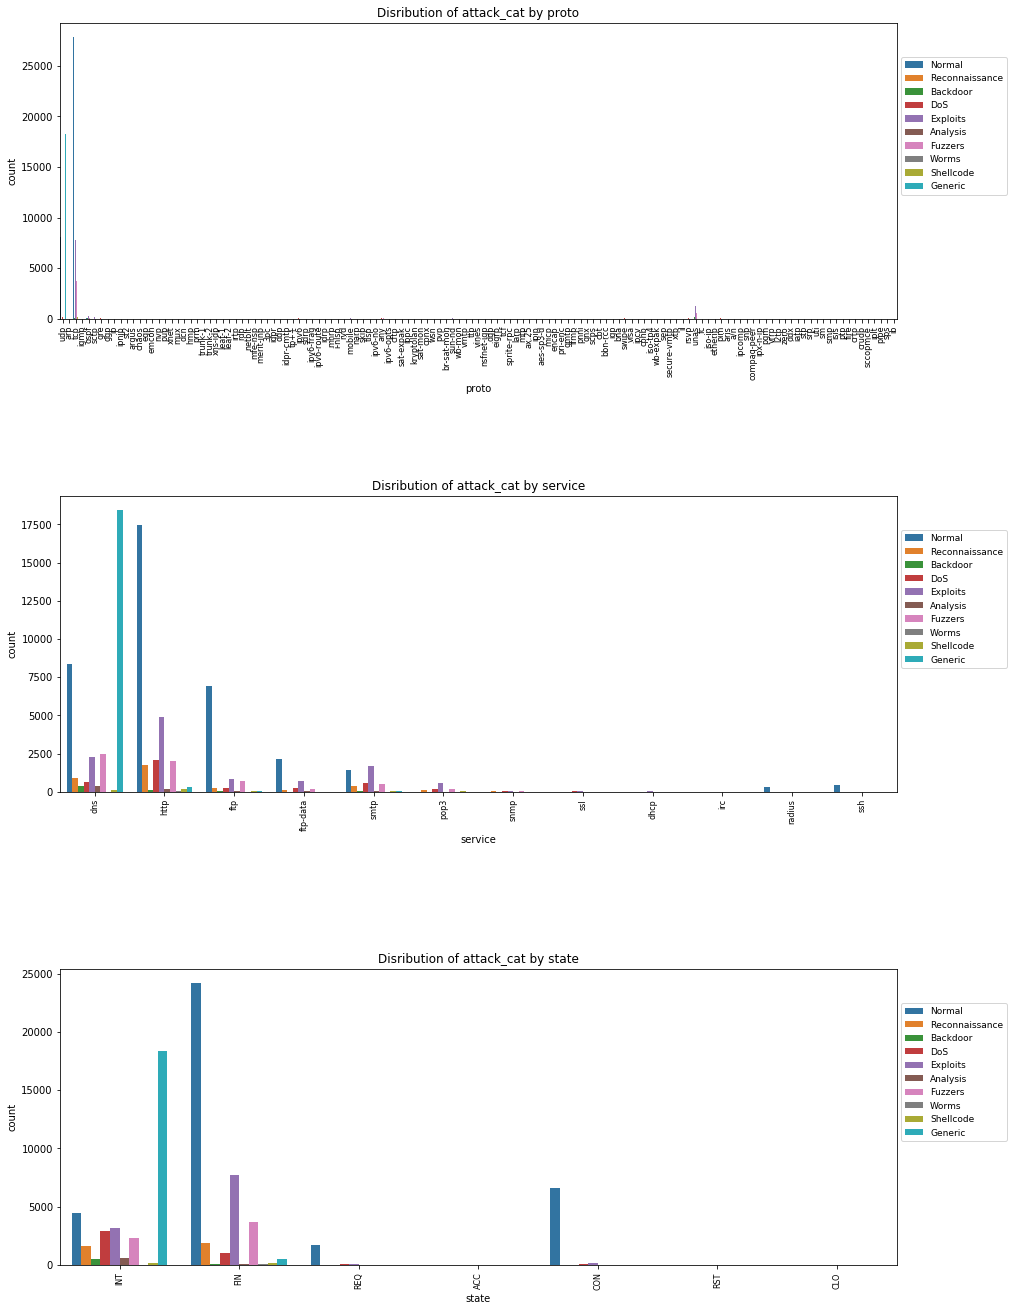

In [49]:
# create crosstab: 

plt.figure(figsize=(15,30))
for i,col in enumerate(nonnumeric_columns.drop('attack_cat')):
    plt.subplot(3,1,i+1)
    sns.countplot(x=df[col], hue=df['attack_cat'], data=df)
    plt.title(f'Disribution of attack_cat by {col}')
    plt.xticks(rotation=90, fontsize=8)
    plt.legend(loc="upper left", prop={'size': 9}, bbox_to_anchor=(1,.9))
plt.subplots_adjust(hspace = 0.6, top = 0.7)
plt.show()

In [50]:
# Convert nonnumeric columns to numeric by dummies: 
categorical = df.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,...,state_RST,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
# Concat dummies variables with dataset:
df = pd.concat([df, dummies], axis=1)
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,state_RST,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,1,0.000011,udp,dns,INT,2,0,496,0,90909.0902,...,0,0,0,0,0,0,1,0,0,0
1,2,0.000008,udp,dns,INT,2,0,1762,0,125000.0003,...,0,0,0,0,0,0,1,0,0,0
2,3,0.000005,udp,dns,INT,2,0,1068,0,200000.0051,...,0,0,0,0,0,0,1,0,0,0
3,4,0.000006,udp,dns,INT,2,0,900,0,166666.6608,...,0,0,0,0,0,0,1,0,0,0
4,5,0.000010,udp,dns,INT,2,0,2126,0,100000.0025,...,0,0,0,0,0,0,1,0,0,0


In [52]:
# Drop all object columns after converting to dummy:
df = df.drop(df.select_dtypes(['object']), axis=1)
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,state_RST,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,...,0,0,0,0,0,0,1,0,0,0
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,...,0,0,0,0,0,0,1,0,0,0
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,...,0,0,0,0,0,0,1,0,0,0
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,...,0,0,0,0,0,0,1,0,0,0
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
# Generate a word cloud image to findout most frequenty  attack words.
#wordcloud = WordCloud(background_color="orange").generate(" ".join(df["attack_cat"]))
#plt.figure(figsize=(15,10))
# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [62]:
df.columns[40:90]

Index(['label', 'norm_label', 'scale_label', 'proto_a/n', 'proto_aes-sp3-d',
       'proto_any', 'proto_argus', 'proto_aris', 'proto_arp', 'proto_ax.25',
       'proto_bbn-rcc', 'proto_bna', 'proto_br-sat-mon', 'proto_cbt',
       'proto_cftp', 'proto_chaos', 'proto_compaq-peer', 'proto_cphb',
       'proto_cpnx', 'proto_crtp', 'proto_crudp', 'proto_dcn', 'proto_ddp',
       'proto_ddx', 'proto_dgp', 'proto_egp', 'proto_eigrp', 'proto_emcon',
       'proto_encap', 'proto_etherip', 'proto_fc', 'proto_fire', 'proto_ggp',
       'proto_gmtp', 'proto_gre', 'proto_hmp', 'proto_i-nlsp', 'proto_iatp',
       'proto_ib', 'proto_idpr', 'proto_idpr-cmtp', 'proto_idrp', 'proto_ifmp',
       'proto_igmp', 'proto_igp', 'proto_il', 'proto_ip', 'proto_ipcomp',
       'proto_ipcv', 'proto_ipip'],
      dtype='object')

In [65]:
# Use train_test_split to create the necessary training and test groups:

x = df.drop(['label', 'id', 'norm_label', 'scale_label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [66]:
# Instantiate our model and store it in a new variable:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train, y_train)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X_test)


# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    X_train.shape[0],
    (y_test != y_pred).sum()
))

Number of mislabeled points out of a total 65865 points : 931


In [67]:
# Calculate the accuracy of the model:
print('Percentage of mislabeled is {}'.format(((y_test != y_pred).sum())*100/len(y_test)))
print('Percentage of correctly labeled is {}'.format(((y_test == y_pred).sum())*100/len(y_test)))

Percentage of mislabeled is 5.653731705835915
Percentage of correctly labeled is 94.34626829416409


In [68]:

print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))


With 20% Holdout: 0.9434626829416408


In [70]:
# Using Confusion Matrix to  analysis of your classifier:
confusion_matrix(y_test, y_pred)


array([[6733,  700],
       [ 231, 8803]], dtype=int64)

In [73]:
# Using Cross validation:

score_train = cross_val_score(bnb, X_train, y_train, cv=10)
print("Accuracy of train dataset: %0.2f (+/- %0.2f)" % (score_train.mean(), score_train.std() * 2))

score_test = cross_val_score(bnb, X_test, y_test, cv=10)
print("Accuracy of train dataset: %0.2f (+/- %0.2f)" % (score_test.mean(), score_test.std() * 2))

Accuracy of train dataset: 0.93 (+/- 0.02)
Accuracy of train dataset: 0.84 (+/- 0.02)


In [75]:
# look at the correlation between Attack and other columns:
np.abs(df.corr())[['label']].sort_values(by='label', ascending=False)

,label
norm_label,1.000000
label,1.000000
attack_cat_Normal,1.000000
scale_label,1.000000
state_INT,0.538576
sttl,0.504159
attack_cat_Generic,0.492654
proto_tcp,0.414626
swin,0.414504
ct_dst_sport_ltm,0.393668


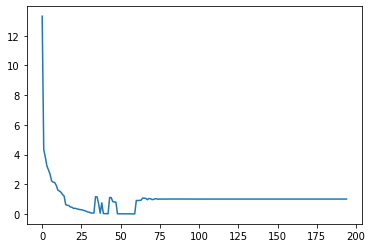

In [76]:
# Use eig_val plot to visualize how many components describe more percentage of variance in the dataset:
x= df.drop(['label', 'id', 'norm_label', 'scale_label'], axis = 1)
x=StandardScaler().fit_transform(x)
Xt = x.T                               
Cx = np.cov(Xt)              
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
                                                
# print scree plot
plt.plot(eig_val_cov)
plt.show()


In [77]:
# Applying PCA for feature reduction: 
X = df.drop(['label', 'id', 'norm_label', 'scale_label'], axis = 1)###??? i have to use log variable or not????
Y = df['label']      

x = StandardScaler().fit_transform(X)
pca = PCA(0.90)
principalComponents = pca.fit_transform(x)

In [78]:
# Look at the pca components:
print(abs( pca.components_ ))

[[3.55572538e-02 3.69892635e-02 4.69373737e-02 ... 1.23888330e-02
  3.03504092e-03 4.94703626e-03]
 [3.24976844e-03 8.74226960e-02 1.47002885e-01 ... 6.40783518e-02
  2.20040964e-02 1.99753812e-03]
 [1.05934175e-01 2.55333237e-01 3.82049476e-01 ... 3.20581433e-02
  9.29121737e-03 2.47685360e-03]
 ...
 [2.75825965e-03 4.26023126e-03 1.26069397e-02 ... 1.08643237e-02
  2.54293538e-02 8.23474858e-01]
 [5.21513813e-03 4.22037667e-03 1.17240938e-03 ... 5.05229403e-02
  8.63588623e-02 1.26837405e-01]
 [3.51287751e-04 3.28127469e-03 6.96121670e-03 ... 1.22744489e-01
  1.87492935e-01 1.29483632e-01]]


In [79]:
# Findout number of components explained 90% of variance in the dataset:
pca_number = pca.n_components_
print(pca_number)

144


In [80]:
# print the percentage of total variance in the dataset explained by each components:
print(
    'The percentage of total variance in the dataset explained by each, component from Sklearn PCA.\n',
    pca.explained_variance_ratio_ ,pca.explained_variance_ratio_.sum() 
)

The percentage of total variance in the dataset explained by each, component from Sklearn PCA.
 [0.06827542 0.0222725  0.01963537 0.01660501 0.01520156 0.01378007
 0.01141423 0.01095654 0.01083753 0.009825   0.00823396 0.00788708
 0.00748055 0.0066887  0.00613969 0.00592994 0.00589048 0.00566188
 0.00563746 0.00547549 0.00545493 0.00539933 0.00530777 0.00526763
 0.00523295 0.00521819 0.00518648 0.00517233 0.00515686 0.00514918
 0.00514609 0.00513967 0.00513717 0.00513587 0.00513388 0.00513217
 0.00513192 0.00513143 0.0051312  0.00513102 0.00513045 0.00513041
 0.00513033 0.00513032 0.00513032 0.00513031 0.00513029 0.00513029
 0.00513027 0.00513026 0.00513026 0.00513026 0.00513026 0.00513026
 0.00513026 0.00513026 0.00513026 0.00513026 0.00513026 0.00513025
 0.00513025 0.00513025 0.00513025 0.00513024 0.00513023 0.00513023
 0.00513022 0.00513021 0.00513021 0.0051302  0.0051302  0.0051302
 0.0051302  0.0051302  0.0051302  0.0051302  0.0051302  0.0051302
 0.0051302  0.0051302  0.0051302  0

In [81]:
# Convert PCA to dataframe:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca' + str(i) for i in range (1, pca_number+1)])
principalDf.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca135,pca136,pca137,pca138,pca139,pca140,pca141,pca142,pca143,pca144
0,-1.786340,-2.295677,0.638001,-0.062633,-0.781113,-0.484867,-0.625178,1.001912,-0.848211,-0.158804,...,1.554108e-10,-8.306451e-11,0.002277,-0.002604,-0.004133,0.001103,-0.027495,-0.052778,0.048691,-0.009025
1,-2.035083,-2.833190,0.629253,0.891033,-1.054074,-0.678335,-0.425728,0.815560,-0.891152,0.097599,...,3.571346e-10,-1.564389e-10,0.013963,-0.032180,0.018550,0.025777,-0.097933,-0.114861,0.169931,0.124693
2,-2.245407,-2.748211,0.621005,0.631443,-1.079166,-0.451195,-0.415213,0.839204,-0.867382,-0.051310,...,2.866260e-10,-4.770204e-11,0.007826,-0.017247,0.006137,0.011691,-0.061491,-0.078655,0.114665,0.082412
3,-2.166761,-2.467112,0.602872,0.381815,-0.928198,-0.471558,-0.480788,0.862815,-0.840338,-0.094444,...,2.402520e-10,-7.151126e-11,0.006272,-0.012917,0.003691,0.008914,-0.051210,-0.071984,0.093579,0.050364
4,-2.073849,-2.666193,0.592142,0.992838,-0.963416,-0.793875,-0.424527,0.753325,-0.869324,0.146069,...,3.862008e-10,-2.270322e-10,0.017254,-0.039911,0.025837,0.033561,-0.117156,-0.135287,0.197897,0.142604


In [84]:
# Concat PCA with target variable:
principalDf['label'] = df['label']

1    45332
0    37000
Name: label, dtype: int64

In [123]:

# Applying logistic Regression model:
logistic=LogisticRegression()

# Create regularization penalty space:
penalty = ['l1', 'l2']

# Create regularization hyperparameter space:
C = np.logspace(1, 3, 5)

# Create hyperparameter options:
parameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation:
logisticgs = GridSearchCV(logistic, parameters, cv=5)

# Fit grid search:
best_model = logisticgs.fit(X_train,y_train)

# View best hyperparameters:

print("tuned hpyerparameters :(best parameters) ",logisticgs.best_params_)
print("accuracy :",logisticgs.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
accuracy : 1.0


In [127]:
# We are making predictions here:

y_preds_train = logisticgs.predict(X_train)
y_preds_test = logisticgs.predict(X_test)#???
# Predict target by using best model:
best_model.predict(X_test)#???

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [122]:
# Applying  LogisticRegressionCV:
logistic_cv = LogisticRegressionCV(cv=5)
logistic_cv.fit(X_train,y_train)

# View best hyperparameters:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 10.0


In [1]:
#ddf1 = dd.from_pandas(df1, npartitions=10)
#ddf2 = dd.from_pandas(df2, npartitions=10)

#merged = dd.merge(ddf1, ddf2, on="proto")
#df_final = merged.compute()

In [2]:
#df_final.head(npartitions=-1)

In [1]:
#df_final = pd.merge(df1.reset_index(),df_new_sample.reset_index(), on ='proto')

In [ ]:
plotScatterMatrix(df2, 20, 10)

In [ ]:
plotPerColumnDistribution(df3, 10, 5)

In [ ]:
plotCorrelationMatrix(df2, 10)
